# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Loading Data from CSV

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking for Null Values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Using Heatmap to identify the intensity of Null values in a column

<Axes: >

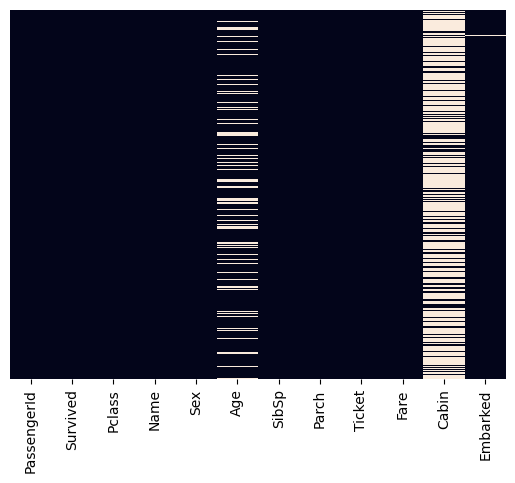

In [151]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# Number of People Unsurvived and Survived

<Axes: xlabel='Survived', ylabel='count'>

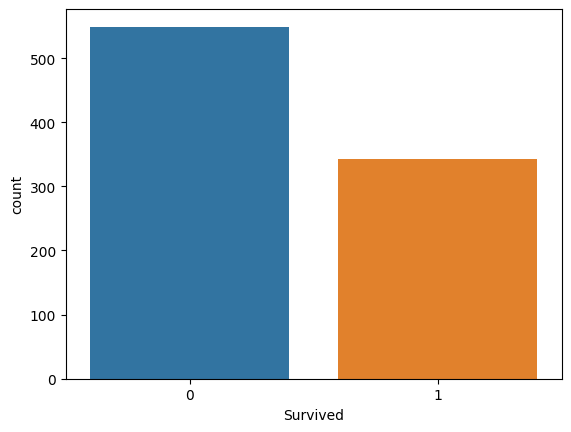

In [152]:
sns.countplot(x='Survived',data=df)

# Survival based on Sex

<Axes: xlabel='Survived', ylabel='count'>

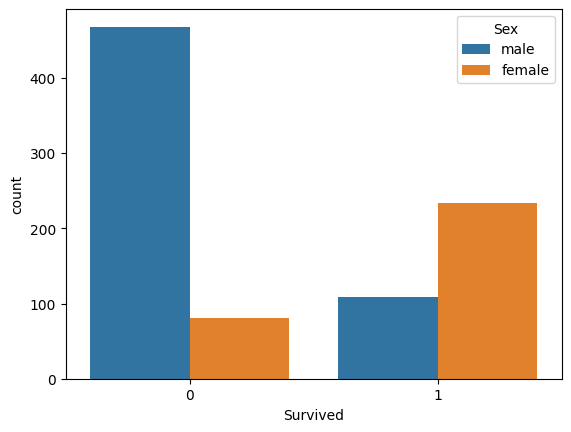

In [153]:
sns.countplot(x="Survived",data= df,hue="Sex")

# Survival rate based on Passenger Class

<Axes: xlabel='Survived', ylabel='count'>

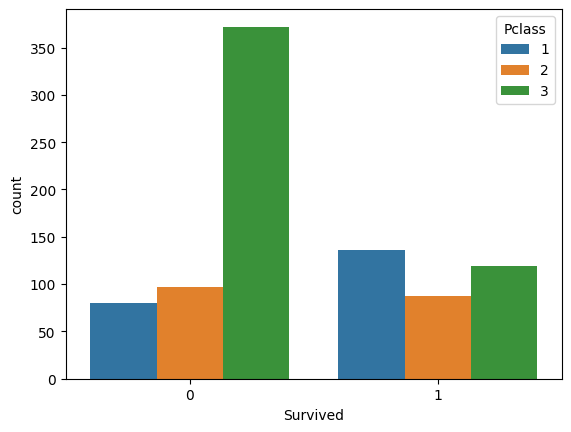

In [154]:
sns.countplot(x="Survived",hue="Pclass",data=df)

# Survival Rate of People having Siblings or Spouse 

<Axes: xlabel='Survived', ylabel='count'>

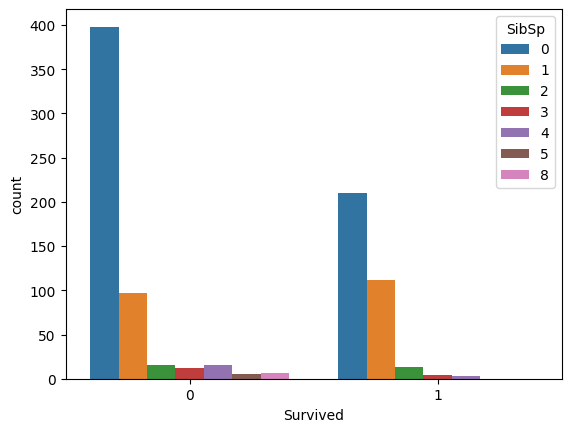

In [155]:
sns.countplot(x="Survived",hue="SibSp",data=df)

# Age of Survived and Unsurvived People based on Sex

<Axes: xlabel='Survived', ylabel='Age'>

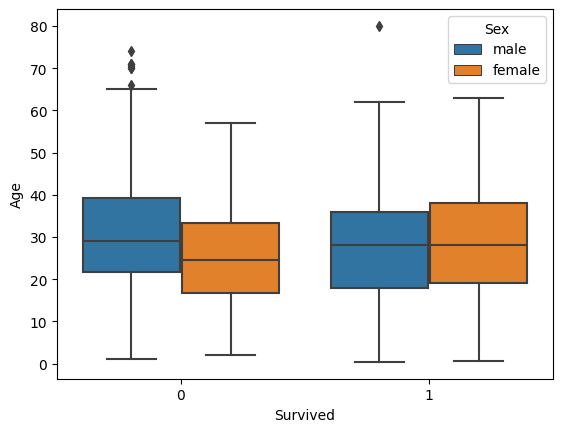

In [156]:
sns.boxplot(x="Survived",y=df['Age'].dropna(),data=df,hue='Sex')

# Age of Survived and Unsurvived People based on Passenger Class 

<Axes: xlabel='Survived', ylabel='Age'>

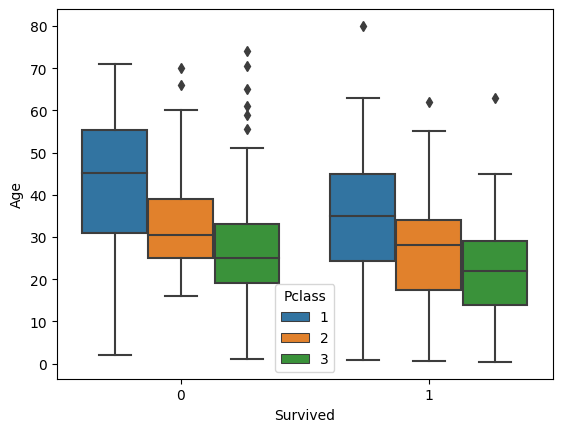

In [157]:
sns.boxplot(x="Survived",y=df['Age'].dropna(),data=df,hue='Pclass')

# Point : We have seen above in the heatmap that Age and Cabin columns have massive null values 

# Average Age of Passengers

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

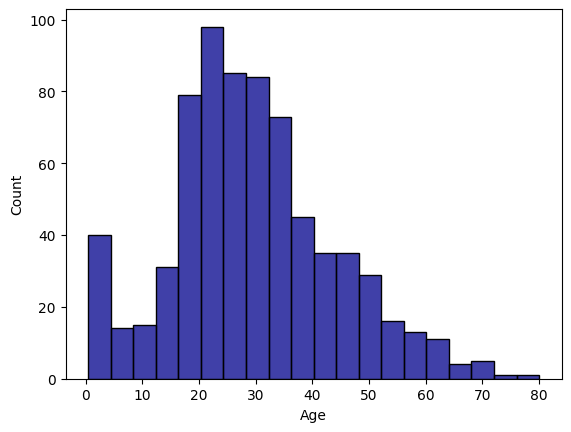

In [158]:
sns.histplot(df['Age'].dropna(),kde=False,color='darkblue')

# Implementing Function to fill the null values in age column by putting the average based on Passenger Class

In [159]:
def normalize_age(col):
    survived = col[0]
    pclass   = col[1]
    age      = col[2]
    if pd.isnull(age):
        if survived == 0:
            if pclass == 1:
                return 45
            elif pclass == 2:
                return 30
            else:
                return 25
        else:
            if pclass == 1:
                return 35
            elif pclass == 2:
                return 28
            else:
                return 22
    else:
        return age
            

In [160]:
df['Age'] = df[['Survived','Pclass','Age']].apply(normalize_age,axis=1)

/tmp/ipykernel_33/2790061066.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  survived = col[0]
/tmp/ipykernel_33/2790061066.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass   = col[1]
/tmp/ipykernel_33/2790061066.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age      = col[2]


# Visulizing the data

# Now we don't have any Null values in Age column

<Axes: >

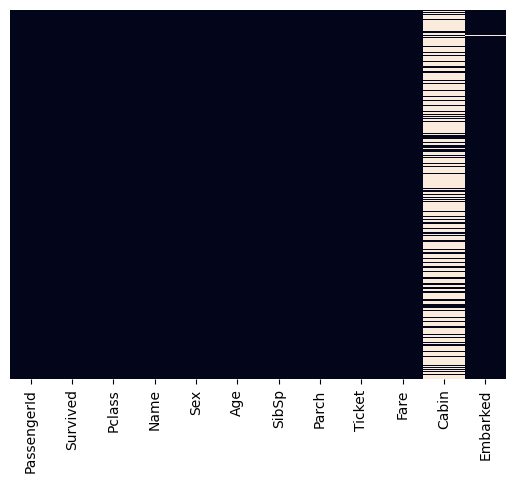

In [161]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


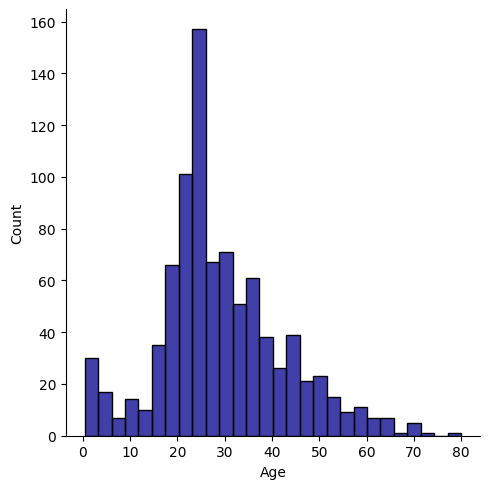

In [162]:
sns.displot(df['Age'].dropna(),kde=False,color='darkblue')

1. Since Null values in Cabin column are much high so it's Rational to drop that column

In [163]:
df.drop('Cabin',axis=1,inplace=True)

In [164]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [165]:
df= df.dropna()

# Converting Catagorical Data into Numerical

In [166]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [167]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


# Converting Boolean values to integer

In [168]:
sex = sex.astype(int)
embark = embark.astype(int)

In [169]:
print("Sex Data")
print(sex.head())
print("Embarked Data")
print(embark.head())

Sex Data
   male
0     1
1     0
2     0
3     0
4     1
Embarked Data
   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


# Analyzing Data using Heatmap

# Now Data is Uniform with no Null values

<Axes: >

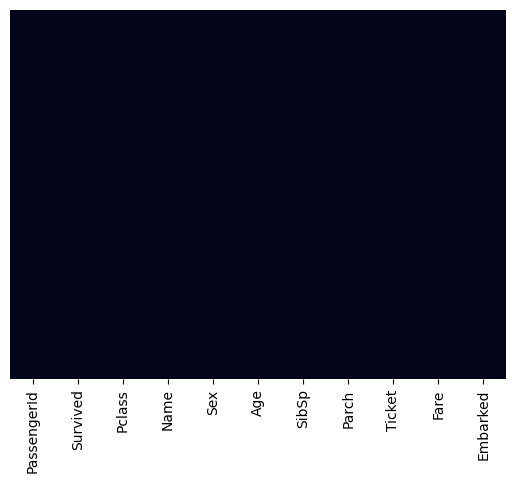

In [170]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# Droping the unnecessary columns before training

In [171]:
df = df.drop(['PassengerId','Name','Sex','Ticket','Embarked'], axis=1)

In [172]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


# Adding the Numeric values to the dataset

In [173]:
df = pd.concat([df,sex,embark],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [174]:
df.rename(columns={'male':'Sex'},inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Using StandardScaler to Normalize the Data

In [175]:
StandardScaler_normalize = StandardScaler()
StandardScaler_y = df['Survived']
StandardScaler_X = StandardScaler_normalize.fit_transform(df.drop('Survived',axis=1))


# Splitting Data into train and test data

In [176]:
X_train, X_test, y_train, y_test = train_test_split(StandardScaler_X,StandardScaler_y,test_size=0.2)

In [177]:
decision_tree = DecisionTreeClassifier()

# Inilizing the Parameters for Hyperparameter tuning for best model output

In [178]:
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter'  : ['best', 'random'],
    'max_depth' : [None, 5 , 10 , 15],
    'min_samples_split' : [2, 5, 10],
    'max_features' : ['sqrt', 'log2']
}

# Using GridSearchCV

In [179]:
clf = GridSearchCV(decision_tree,parameter,cv=5,scoring='precision')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='precision')

# Getting best Parameter for Model

In [180]:
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'splitter': 'best'}
0.842006882006882


In [181]:
best_param = clf.best_params_

# Training Model with best Parameters

In [182]:
best_decision_tree = DecisionTreeClassifier(**best_param)
best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=10)

# Taking Predictions

In [183]:
pred = best_decision_tree.predict(X_test)

In [184]:
print(accuracy_score(y_test,pred))

0.7640449438202247


In [185]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.75      0.92      0.83       110\n           1       0.80      0.51      0.62        68\n\n    accuracy                           0.76       178\n   macro avg       0.77      0.72      0.73       178\nweighted avg       0.77      0.76      0.75       178\n'

# Model Output using MinMaxScaler

In [186]:
MinMax_normalize = MinMaxScaler()
MinMax_y = df['Survived']
MinMax_X = MinMax_normalize.fit_transform(df.drop('Survived',axis=1))

In [187]:
X_train, X_test, y_train, y_test = train_test_split(MinMax_X,MinMax_y,test_size=0.2)

In [188]:
decision_tree = DecisionTreeClassifier()

# Using Same Parameters as Above

In [189]:
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter'  : ['best', 'random'],
    'max_depth' : [None, 5 , 10 , 15],
    'min_samples_split' : [2, 5, 10],
    'max_features' : ['sqrt', 'log2']
}

In [190]:
clf = GridSearchCV(decision_tree,parameter,cv=5,scoring='precision')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='precision')

In [191]:
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'splitter': 'best'}
0.8693980409834067


In [192]:
best_param = clf.best_params_

# Training with best parameters

In [193]:
best_decision_tree = DecisionTreeClassifier(**best_param)
best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=5)

In [194]:
pred = best_decision_tree.predict(X_test)

In [195]:
print(accuracy_score(y_test,pred))

0.848314606741573


In [196]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.95      0.89       112\n           1       0.88      0.68      0.77        66\n\n    accuracy                           0.85       178\n   macro avg       0.86      0.81      0.83       178\nweighted avg       0.85      0.85      0.84       178\n'

In [199]:
np.savetxt("submission.csv", 
           pred,
           delimiter =", ",  # Set the delimiter as a comma followed by a space
           fmt ='% s')  # Set the format of the data as string

In [204]:
# Use SHAP to explain predictions
explainer = shap.TreeExplainer(best_decision_tree)
shap_values = explainer.shap_values(X_test)

In [205]:

# Visualize SHAP explanations
shap.initjs()  # Required for Jupyter Notebook
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test[0])

In [1]:
import plotly.graph_objects as go

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))
fig.show()


In [2]:
import plotly.graph_objects as go

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a line plot
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'))
fig.show()


In [3]:
import plotly.graph_objects as go

# Sample data
x = ['A', 'B', 'C', 'D']
y = [10, 20, 15, 25]

# Create a bar plot
fig = go.Figure(data=go.Bar(x=x, y=y))
fig.show()


In [4]:
import plotly.graph_objects as go

# Sample data
x = ['A', 'A', 'B', 'B', 'C', 'C', 'C', 'D']
y = [10, 20, 15, 25, 30, 35, 40, 45]

# Create a box plot
fig = go.Figure(data=go.Box(y=y, x=x))
fig.show()


In [5]:
import plotly.graph_objects as go

# Sample data
x = ['A', 'B', 'C', 'D']
y = ['W', 'X', 'Y', 'Z']
z = [[10, 15, 20, 25],
     [15, 20, 25, 30],
     [20, 25, 30, 35],
     [25, 30, 35, 40]]

# Create a heatmap
fig = go.Figure(data=go.Heatmap(x=x, y=y, z=z))
fig.show()


In [6]:
import plotly.graph_objects as go

# Sample data
x = ['A', 'A', 'B', 'B', 'C', 'C', 'C', 'D']
y = [10, 20, 15, 25, 30, 35, 40, 45]

# Create a violin plot
fig = go.Figure(data=go.Violin(y=y, x=x))
fig.show()


In [7]:
import plotly.graph_objects as go

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
z = [10, 15, 20, 25, 30]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])
fig.show()


In [9]:
import plotly.graph_objects as go

# Sample data for choropleth map
locations = ['region1', 'region2', 'region3', 'region4']
values = [10, 20, 15, 25]

# Create choropleth map
fig_choropleth = go.Figure(go.Choropleth(locations=locations, z=values))
fig_choropleth.update_layout(title_text='Choropleth Map')

# Sample data for pie plot
labels = ['Category A', 'Category B', 'Category C', 'Category D']
sizes = [30, 20, 25, 25]

# Create pie plot
fig_pie = go.Figure(go.Pie(labels=labels, values=sizes))
fig_pie.update_layout(title_text='Pie Plot')

# Display both plots
fig_choropleth.show()
fig_pie.show()


In [10]:
import plotly.graph_objects as go

# Sample data for choropleth map
locations = ['region1', 'region2', 'region3', 'region4']
values = [10, 20, 15, 25]

# Sample data for pie plot
labels = ['Category A', 'Category B', 'Category C', 'Category D']
sizes = [30, 20, 25, 25]

# Create choropleth map
fig_choropleth = go.Figure(go.Choropleth(locations=locations, z=values))
fig_choropleth.update_layout(title_text='Choropleth Map')

# Create pie plot
fig_pie = go.Figure(go.Pie(labels=labels, values=sizes))
fig_pie.update_layout(title_text='Pie Plot')

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Choropleth Map', 'Pie Plot'))
fig.add_trace(fig_choropleth.data[0], row=1, col=1)
fig.add_trace(fig_pie.data[0], row=1, col=2)

# Update layout
fig.update_layout(height=600, width=1000, title_text='Choropleth Map and Pie Plot')
fig.show()


NameError: name 'make_subplots' is not defined